## 📦 First Things First: Importing What We Need

Before diving in, we bring in all the necessary tools—think of it as assembling your ingredients before you start cooking. We'll need libraries for handling data, plotting visuals, processing text, and of course, training our logistic regression model.


In [1]:
# Basic tools for data manipulation and numerical operations
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 🗂️ Let’s Peek Into the Data

We’re working with a dataset of SMS messages labeled as either **ham** (not spam) or **spam**. We’ll clean it up a bit—just keeping the relevant columns and renaming them for readability.


In [2]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']  # Rename for clarity
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 🔍 Exploring the Data

Here's a quick look at how many spam vs ham messages we have. This helps us see if the dataset is balanced or not—which can affect model performance!


/tmp/ipython-input-10-2334772037.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


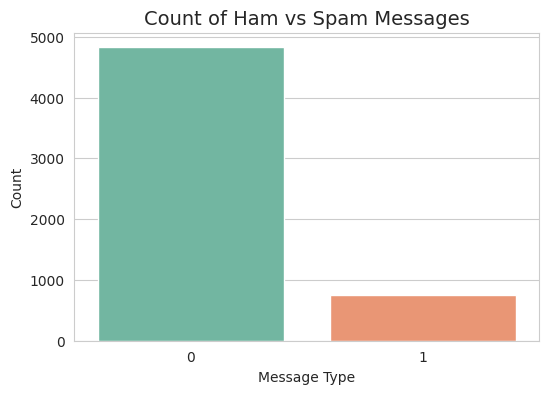

In [10]:
# Count of each label
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title("Count of Ham vs Spam Messages", fontsize=14)
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()


## 🛠️ Preprocessing: Turning Words Into Numbers

we need to translate our SMS text into numbers. We'll use a method called **Bag of Words** which turns text into word-frequency vectors. Also, we’ll convert the labels to 0 and 1 so the model can understand what’s spam and what’s not.


In [4]:
# Convert labels to binary values: ham = 0, spam = 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Vectorize the text data (Bag of Words)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])

# Target column
y = df['label']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


## 🚀 Let’s Train the Model!

Now it’s time to feed the preprocessed data into our **logistic regression model**. This algorithm is especially good at binary classification tasks like spam vs ham.


In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

## 🧪 How Did We Do?

Let’s measure how well our model performs on the test set. We'll look at accuracy, precision, recall, and F1-score. A good spam filter should be precise (not marking legit messages as spam) and have good recall (catching most of the spam).


In [6]:
# Predicting on test set
y_pred = model.predict(X_test)

# Evaluation Metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.9775784753363229

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## 🧾 Confusion Matrix: What's Going Right (and Wrong)?

A confusion matrix is like a report card. It shows us exactly how many messages were classified correctly or incorrectly. Ideally, we want everything in the diagonals (correct predictions).


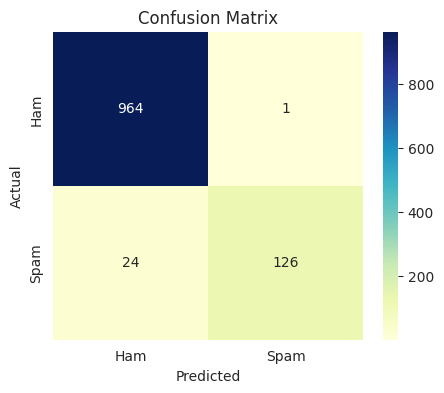

In [8]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 💾 Bonus: Save Your Model

Training a model takes time. Don’t do it every time! Save your trained model and the vectorizer so you can reuse them later to classify new messages.


In [9]:
import pickle

# Save the model
with open('spam_classifier_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)
